In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve, make_scorer, precision_score, average_precision_score
from sklearn.metrics import precision_recall_curve, auc, fbeta_score, f1_score

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from imblearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import ComplementNB

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE, ADASYN, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler, NeighbourhoodCleaningRule, OneSidedSelection, EditedNearestNeighbours

import random
import warnings
warnings.simplefilter('ignore')

In [12]:
X_train = pd.read_csv(r'C:/Users/2bogu/OneDrive/Desktop/Sringboard_Materials/capstone2/data/interim/X_train_fl')
y_train = pd.read_csv(r'C:/Users/2bogu/OneDrive/Desktop/Sringboard_Materials/capstone2/data/interim/y_train_fl')


X_test = pd.read_csv(r'C:/Users/2bogu/OneDrive/Desktop/Sringboard_Materials/capstone2/data/interim/X_test_fl')
y_test = pd.read_csv(r'C:/Users/2bogu/OneDrive/Desktop/Sringboard_Materials/capstone2/data/interim/y_test_fl')


df_columns = X_test.columns

In [13]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values.ravel()
y_test= y_test.values.ravel()

# Overview 

### The purpose 
of this project is to create a model that can identify applicants to the New York State Energy Reaserch and Development  Green Jobs Green New York (GJGNY) Loan Program that are likely to default on their loan.  The GJGNY program offeres low interest loans to low income households to install energy effienct technology in thier homes, thereby servicing an underserved community, lowering energy costs, and reducing the overall carbon footprint of NY.  


### The data
dates from November 2010 to September 2019(?).  It has 13 columns and 25,127 usable rows.  It is striking that, even though these loans are made to low income households, only %1.3 of the total loans made have had to be canceled for reasons other than the death of the client.  If only loans that have been completed, either paid off or canceled, are considered then there is only a %5 cancel rate over 5163 observations.  Both datasets will be considered.  Low income households are typically viewed as too risky to lend to by commercial banks, and one of the reasons GJGNY has posted this dataset was to challenge this conception.

### Summary:
 This is a classification problem with a severly imbalenced dataset.  My metric of choice is precision because GJGNY's ultimate goal is to provide loans to an underserved group and false positives are directly contrary to their goal.  However, this data proved difficult to work with.  For reason this two different interpritations of the data (completed loans vs all loans) and Fbeta = [0.1, 0.2, 0.3] scores are also considered.

# Constants and Functions

## Obsolete 

In [14]:
# def classify(model, X_train=X_train, y_train=y_train,X_test=test ):
#     '''Takes in model, X_train,X_test, y_train
#     returns tuple of (fit model, y_pred, predict_proba[:,1])'''
    
#     m = model.fit(X_train, y_train)
    
#     pred = m.predict(test)
    
#     prob = m.predict_proba(test)[:,1]
    
#     return (m, pred, prob)

# ### CUSTOME SCORERS FOR PRECISION METRICS
# pre_scorer = make_scorer(precision_score)
# avg_pre_scorer = make_scorer(average_precision_score)
# fb1_scorer = make_scorer(fbeta_score, beta=0.1)
# fb3_scorer = make_scorer(fbeta_score, beta=0.3)
# fb5_scorer = make_scorer(fbeta_score, beta=0.5)



# #### AUC FOR PRECISION RECALL CURVE
# def pr_auc(y_true, y_score, **kwargs):
#     pre, re, _ = precision_recall_curve(y_true, y_score)
#     return auc(re, pre)

# pr_auc_scorer = make_scorer(pr_auc)
# f1_scorer = make_scorer(f1_score)
# fb9_scorer = make_scorer(fbeta_score, beta=0.9)
# fb7_scorer = make_scorer(fbeta_score, beta=0.7)




# metrics = [pre_scorer, avg_pre_scorer, fb1_scorer, fb3_scorer, fb5_scorer]

# ### CV FUNCTION THAT RETURNS FIVE PRECISION SCORES
# def p5_cv(model, X=X_train, y=y_train, cv=xcv, stats=False):
#     '''takes the model, X_train, y_train, cv(=5)
#     returns precision, aaverage precision and three fb scores'''
    
#     scores = cross_val_score(model, X, y, cv=cv, 
#                              scoring=pre_scorer, n_jobs=-1)
    
#     scores1 = cross_val_score(model, X, y, cv=cv, 
#                              scoring=avg_pre_scorer, n_jobs=-1)
    
#     scores2 = cross_val_score(model, X, y, cv=cv, 
#                              scoring=fb1_scorer, n_jobs=-1)
    
#     scores3 = cross_val_score(model, X, y, cv=cv, 
#                              scoring=fb3_scorer, n_jobs=-1)
    
#     scores4 = cross_val_score(model, X, y, cv=cv, 
#                              scoring=fb5_scorer, n_jobs=-1)
 
#     if stats:
#         print(str(model))
#         print(scores)
#         print('Mean precision:', scores.mean())
#         print('STD precision:', scores.std())
#         print(scores1)
#         print('Mean average precision:', scores1.mean())
#         print('STD average precision:', scores1.std())
#         print(scores2)
#         print('Mean PR auc:', scores2.mean())
#         print('STD PR auc:', scores2.std())
    
#     return [round(scores.mean(),3), 
#             round(scores1.mean(),3), 
#             round(scores2.mean(),3), 
#             round(scores3.mean(),3), 
#             round(scores4.mean(),3)]

# ### CV FUNCTION THAT RETURNS THREE PRECISION SCORES
# def p3_cv(model, X=X_train, y=y_train, cv=xcv, stats=False):
#     '''takes the model, X_train, y_train, cv(=5)
#     returns auc of precision recall curve, precision, and average precision'''
    
#     scores = cross_val_score(model, X, y, cv=cv, 
#                              scoring=pre_scorer, n_jobs=-1)
    
    
#     scores1 = cross_val_score(model, X, y, cv=cv, 
#                              scoring=avg_pre_scorer, n_jobs=-1)
    
#     scores2 = cross_val_score(model, X, y, cv=cv, 
#                              scoring=pr_auc_scorer, n_jobs=-1)
    
#     if stats:
#         print(str(model))
#         print(scores)
#         print('Mean precision:', scores.mean())
#         print('STD precision:', scores.std())
#         print(scores1)
#         print('Mean average precision:', scores1.mean())
#         print('STD average precision:', scores1.std())
#         print(scores2)
#         print('Mean PR auc:', scores2.mean())
#         print('STD PR auc:', scores2.std())
    
#     return (scores.mean(), scores1.mean(), scores2.mean())



# def model_cv(model, X=X_train, y=y_train, cv=5, scoring=pre_scorer, f1=True, stats=False):
#     '''takes the model, X_train, y_train, cv(=5), scoring(='roc_auc')
#     returns mean roc_auc and mean of input socre default f1, prints array, mean, std of scores scores'''
    
#     scores = cross_val_score(model, X, y, cv=cv, 
#                              scoring='pr_auc', n_jobs=-1)
    
    
#     scores1 = cross_val_score(model, X, y, cv=cv, 
#                              scoring=scoring, n_jobs=-1)
    
#     if stats:
#         print(str(model))
#         print(scores)
#         print('Mean roc-auc:', scores.mean())
#         print('STD roc-auc', scores.std())
    
#     return (scores.mean(), scores1.mean())

# def model_cv1(model, X=X_train, y=y_train, cv=xcv, scoring=pre_scorer):
#     '''takes the model, X_train, y_train, cv(=5), scoring(='roc_auc')
#     returns mean roc_auc and mean of input socre default f1, prints array, mean, std of scores scores'''
    
    
#     scores = cross_val_score(model, X, y, cv=cv, 
#                              scoring=scoring, n_jobs=-1)    
    
#     return scores.mean()


In [15]:
# def baseline_modeling(clfs=clfs,
#                       samp_strats=samplings,
#                       t_clf=t_clfs,
#                       t_sampling=t_samplings,
#                       t_metric=t_metrics):

#     fig = plt.figure(figsize=(7, 7))

#     rows = []
#     for clf in clfs:
#         row = []
#         for s in samp_strats:
#             if s == None:
#                 steps = [('c', clf)]
#             else:
#                 steps = [('over', s), ('under', under), ('c', clf)]

#             pl = Pipeline(steps=steps)

#             # evaluates model with every metric, returns list
#             s = cv_ap(pl)

#             row.append(s)

#         rows.append(row)

#         #ax = fig.add_subplot(2,2,(num+1))

#     #plots heatmap for each clf
#     sns.heatmap(
#         pd.DataFrame(data=rows, index=t_clfs, columns=t_sampling),
#         #ax=ax,
#         annot=True)
    
#     plt.title('AP of Baseline Models')
#     plt.tight_layout()
#     plt.show()

## Constants

In [16]:
random.seed(42)

smo = SMOTE(sampling_strategy=0.1) # 'over' in pipeline
bor = BorderlineSMOTE(sampling_strategy=0.1) # 'over' in pipeline
ada = ADASYN(sampling_strategy=0.1) # 'over'
svm = SVMSMOTE(sampling_strategy=0.1)

samplings = [None,smo,bor,ada,svm ]#not working for ?

rus = RandomUnderSampler(sampling_strategy=0.5)
ncr = NeighbourhoodCleaningRule(n_jobs=-1)
enn = EditedNearestNeighbours(n_jobs=-1)
oss = OneSidedSelection(n_neighbors=1,n_seeds_S=200,n_jobs=-1, random_state=2)


under = [None, rus, ncr, enn, oss]

#cv = StratifiedKFold(n_splits=5)
#xcv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=2)

cv_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=2)
cv_outer = StratifiedKFold(n_splits=3, shuffle=True, random_state=2)

ap_scorer = make_scorer(average_precision_score)

clfs = [LogisticRegression(random_state=2),
       KNeighborsClassifier(),
       RandomForestClassifier(random_state=2),
       GradientBoostingClassifier(random_state=2)]

t_clfs = ['Log Reg','KNN', 'RF','GB'] 
t_samplings = ['None', 'SMOTE','Borderline','ADASYN','SVM SMOTE']#index svm not working for whatever reason
t_under = ['NONE', 'RandUS', 'NCR', 'ENN', 'OSS']

unders = [0.35, 0.4, 0.45, 0.5, 0.55]
overs = [0.1, 0.125, 0.15, 0.175, 0.2]# 0.05, 0.15, 0.2, 0.25
ks = range(2,8)
seeds_S = range(100,601,100)
th_cleaning = [.2,.4,.6,.8]

file_path='C:/Users/2bogu/Desktop/Sringboard_Materials/capstone2/src/visualization/'
# ### POTENTIALLY OBSOLETE
pre_scorer = make_scorer(precision_score)
avg_pre_scorer = make_scorer(average_precision_score)
fb1_scorer = make_scorer(fbeta_score, beta=0.1)
fb3_scorer = make_scorer(fbeta_score, beta=0.3)
fb5_scorer = make_scorer(fbeta_score, beta=0.5)

metrics = [pre_scorer, avg_pre_scorer, fb1_scorer, fb3_scorer, fb5_scorer]

t_metrics = ['(P)','(AP)','(Fb1)','(Fb3)','(Fb5)'] #columns

## Functions

In [17]:
def assembly_line(clfs=clfs, samplings=samplings, under=under):
    '''Assembles a variety of models from three lists: classifiers, oversampling strats, undersampling strats
        used in assemble_models'''
    return [[clf, s, u] for clf in clfs for s in samplings for u in under]


def t_assembly_line(clfs=clfs, sampling=t_samplings, t_under=t_under):
    '''constructs keys that will be used to select models in dict'''
    return [
        t_clf + ' ' + t_s + ' ' + t_u for t_clf in t_clfs
        for t_s in t_samplings for t_u in t_under
    ]


def assemble_models(under=under, t_under=t_under):
    '''creats dict with t_assembly_line as key and assembly line as content'''
    base_models = assembly_line(under=under)

    t_base_models = t_assembly_line(t_under=t_under)

    init_models = {}

    for i in range(0, len(base_models)):
        init_models.update({t_base_models[i]: base_models[i]})

    return init_models



def cv_ap(model,
          cv_strat=cross_val_score,
          cv=cv_inner,
          scoring=ap_scorer,
          X=X_train,
          y=y_train,
          stats=False):
    '''crossvalidation with printout'''

    scores = cv_strat(model, X, y, cv=cv, scoring=scoring)

    if stats == True:
        print('----------------------------------------------------')
        print('Model:', model)
        print('Metric:', str(scoring))
        print('CV strat:', str(cv_strat))
        print('Mean:', scores.mean())
        print('STD:', scores.std())
        print('----------------------------------------------------')

    return round(scores.mean(), 4)


def show_hm(models, title='Average Precision'):
    fig = plt.figure(figsize=(7, 7))

    dis = {'Log': [], 'KNN': [], 'RF': [], 'GB': []}

    for dis_key in dis:
        for model_key in models:
            if dis_key in model_key:
                dis[dis_key].append(models[model_key][-1])

    sns.heatmap(pd.DataFrame.from_dict(dis,
                                       orient='index',
                                       columns=t_samplings),
                annot=True)
    plt.title(title)
    plt.show()


def show_hm2(models, fp='init_hm',save=False):
    '''displays up to four heatmaps of different classifiers illistrating
    how different undersampling and oversampling stats do'''
    
    lrm = {'NONE': [], 'RandUS': [], 'NCR': [], 'ENN':[], 'OSS': []}
    knnm = {'NONE': [], 'RandUS': [], 'NCR': [], 'ENN':[],'OSS': []}
    rfm = {'NONE': [], 'RandUS': [], 'NCR': [], 'ENN':[],'OSS': []}
    gbm = {'NONE': [], 'RandUS': [], 'NCR': [], 'ENN':[],'OSS': []}

    for model_key in models:
        if 'Log' in model_key:
            for lrm_key in lrm:
                if lrm_key in model_key:
                    lrm[lrm_key].append(models[model_key][-1])

        elif 'KNN' in model_key:
            for knnm_key in knnm:
                if knnm_key in model_key:
                    knnm[knnm_key].append(models[model_key][-1])

        elif 'RF' in model_key:
            for rfm_key in rfm:
                if rfm_key in model_key:
                    rfm[rfm_key].append(models[model_key][-1])

        elif 'GB' in model_key:
            for gbm_key in gbm:
                if gbm_key in model_key:
                    gbm[gbm_key].append(models[model_key][-1])

    all_m = [lrm, knnm, rfm, gbm]

    fig = plt.figure(figsize=(15, 15))
    for num, a in enumerate(all_m):
        fig.add_subplot(2, 2, (num + 1))
        sns.heatmap(pd.DataFrame.from_dict(a,
                                           orient='index',
                                           columns=t_samplings),
                    annot=True)
        plt.title(t_clfs[num])
    
    if save==True:
        filepath = file_path+fp
        plt.savefig(filepath,format='png')
    
    plt.show()
    
    return all_m


def show_cms(models, titles=None, test=y_train, sx=5, sy=5, fx=15, fy=10, is_dict=True,fp='init_cm',save=False):
    fig = plt.figure(figsize=(fx, fy))
    '''loops through dict of models to create and show confusion matrixs
        can show up to 25 by default'''

    if is_dict == True:
        for model_key, num in zip(models, range(1, (len(models) + 1))):
            m, pred, proba, score = models[model_key]

            cm = confusion_matrix(test, pred, normalize=None)

            ax = fig.add_subplot(sx, sy, num)
            dis = ConfusionMatrixDisplay(cm).plot(ax=ax, cmap=plt.cm.Blues)

            ax.set_title(model_key)

    else:
        for model, num in zip(models, range(1, (len(models) + 1))):

            m, pred, proba = model

            cm = confusion_matrix(test, pred, normalize=None)

            ax = fig.add_subplot(sx, sy, num)
            dis = ConfusionMatrixDisplay(cm).plot(ax=ax, cmap=plt.cm.Blues)

            ax.set_title(titles[(num - 1)])

    

    plt.tight_layout()
    
    if save == True:
        filepath = file_path+fp
        plt.savefig(filepath,format='png')
        
    plt.show()
    

def classify_many(models, X=X_train, y=y_train):
    '''Handels inital modeling returns dict with fitted model,
        predictions, proba, and cross val score
        use show_hm2 with it'''

    fitted_models = {}

    for model_key in models:

        if 'Pipeline' in str(models[model_key]):
            pl = models[model_key]

        else:
            clf, s, u = models[model_key]

            #if s == None:
            #    steps = [('c', clf)]
            #else:
            steps = [('over', s), ('under', u), ('c', clf)]
            pl = Pipeline(steps=steps)

        score = cv_ap(pl)
        fitted = pl.fit(X, y)
        pred = fitted.predict(X_train)
        proba = fitted.predict_proba(X_train)[:, 1]
        #score = average_precision_score(y_test,proba)
        fitted_models.update({
            model_key : [fitted, pred, proba, score]
        })
    return fitted_models

def nested_cv(model, params, model_key,multi_grid=True,cv_outer=cv_outer, cv_inner=cv_inner,scoring=ap_scorer,n_jobs=-1, print_out=True):
    '''Preforms nested cv process outlined in sk learn docs'''
    outer_scores = []
    models = []
    
    # creates new train test sets for each outer loop
    
    for cv_train_ix,cv_test_ix in cv_outer.split(X_train, y_train): #cite source?
        cv_X_train, cv_X_test = X_train[cv_train_ix,:],X_train[cv_test_ix,:]
        cv_y_train, cv_y_test = y_train[cv_train_ix],y_train[cv_test_ix]
        
        if multi_grid == True:
            for p in params:
                model = gs_tuning(model,p,cv_X_train,cv_y_train,scoring)
        else:
            model = gs_tuning(model,params,cv_X_train,cv_y_train,scoring)
        
        
        score = cv_ap(model)
        #proba = model.predict_proba(cv_X_test)[:, 1]
        
        #score = average_precision_score(cv_y_test,proba)
        
        outer_scores.append(score)
        models.append(model)
    
    i = np.argmax(outer_scores)
    
    if print_out == True:
        #print('----------------------------------------------------------------------------------------')
        print(
            '-----------------------------------------------------------------------------------------'
        )
        #print('                                                                                        ')
        print(model_key)
        print("Average AP: {0}, Std AP: {1}, Best AP: {2}".format(np.round(np.mean(outer_scores), 4),
                                                                  np.round(np.std(outer_scores), 4), 
                                                                  round(outer_scores[i], 4)))
        print('Best Estimator:', models[i][-1])
        print(
            '-----------------------------------------------------------------------------------------'
        )
    
    
    
    return models[i]
        

def gs_tuning(model,
              params,
              X,
              y,
              scoring,
              n_jobs=-1,
              cv=cv_inner,
             print_out=False):
    '''Grid search with printouts all in one'''
    
    gs = GridSearchCV(estimator=model,
                      param_grid=params,
                      scoring=scoring,
                      n_jobs=n_jobs,
                      cv=cv_inner,
                      refit=True)
    
    
    res = gs.fit(X, y)

    if print_out == True:
        #print('----------------------------------------------------------------------------------------')
        print(
            '-----------------------------------------------------------------------------------------'
        )
        #print('                                                                                        ')
        print(gs.best_params_, )
        print('Metric: ', gs.scorer_)
        print('Train score:', gs.best_score_)
        print('Test score:', gs.score(X_test,
                                      y_test))  #roc_auc_score(y_test, pred)
        print(gs.best_estimator_)
        print(
            '-----------------------------------------------------------------------------------------'
        )
        #print('                                                                                        ')
    return res.best_estimator_


def gridsearch_squared(all_models, has_pipe=True, scorer=True, print_out=False):
    '''Designed to automatically carry out hyperparam tuning
        works with rand forest, gradientboost, log reg, KNN, isolated forest, oneclass svm
        staggers hyperparams, so not truee gridsearch, to save time
        uses nested cross val strat
        return {key : [model, pred, prob, score]}'''
    new_models = {}

    for model_key in all_models:
        multi_grid = True
        
        if has_pipe == False:
            clf, s, u = all_models[model_key]

            #if s == None:
            #    steps = [('c', clf)]
            #else:
            steps = [('over', s), ('under', u), ('c', clf)]
            pl = Pipeline(steps=steps)
        else:
            if scorer==True:
                pl, pred, proba, scorer = all_models[model_key]
            else:
                pl, pred, proba, score = all_models[model_key]
                scorer=ap_scorer

        if 'RF' in model_key:  ### IF IT WONT PROCESS ANYTHING CHANGE THIS PART

            params = [{
                'c__criterion': ['gini', 'entropy']
            , 
                'c__max_depth': [1, 2, 3, 4, 5, None],
                'c__min_samples_split': range(5, 17)
            }, {
                'c__min_samples_leaf': range(1, 7),
                'c__max_features': ['sqrt', 'log2', 'auto']
            , 
                'c__bootstrap': [True, False],
                'c__class_weight': ['balanced', 'balanced_subsample', None]
            }, {
                'c__n_estimators': range(90, 146, 5)
            }]

        elif 'GB' in model_key:

            params =[ {
                'c__n_estimators': range(10, 21, 1)
            , 
                'c__max_depth': range(2, 7),
                'c__min_samples_split': range(1, 11)
            },{ 
                'c__min_samples_leaf': range(1, 7),
                'c__max_features': ['sqrt', 'log2', None, 'auto']
            , 
                'c__subsample': [0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15]
            , 
                'c__learning_rate': [0.08, .1, .2, .3]
            }]

        elif 'Log Reg' in model_key:

            params = [{
           
                'c__C': [0.01, 0.1, 1, 10,100]
            , 
                'c__penalty': ['l1', 'l2', 'elasticnet', 'none']
            , 
                'c__class_weight': ['balanced', None],
                'c__solver':
                ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
            }, {
                
                'c__l1_ratio': [.1, .3, .5, .7, .9],
                'c__multi_class': ['auto', 'ovr', 'multinomial']
            }]
            
        elif 'KNN' in model_key:

            params = [{
                'c__n_neighbors': [2, 3, 4, 5, 6, 7]
            , 
                'c__weights': ['uniform', 'distance'],
                'c__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }, {
                'c__leaf_size': [20, 25, 30, 35, 40]
            , 
                'c__p': [1, 2]
            }]

        elif 'iso' in model_key:
                
                params = [{
                    'c__n_estimators': range(80,151,10)
                , 
                    'c__max_samples': ['auto', 100000000]
                , 
                    'c__contamination': ['auto', 0.044, 0.066, 0.1]
                }, { 
                    'c__max_features': range(1,10)
                , 
                    'c__bootstrap': [True, False]
                }]
                
        elif 'OneClass' in model_key:
                
                params = [{
                    'c__kernel': ['linear','poly','rbf','sigmoid','precomputed']
                , 
                    'c__degree': range(2,6)
                , 
                    'c__gamma':['scale','auto']
                , 
                    'c__tol':[1.0e-2, 1.0e-3, 1.0e-4]
                }, {
                    'c__nu':[0.25, 0.5, 0.75]
                , 
                    'c__shrinking':[True, False]
                , 
                    'c__cache_size':[100,601,100]
                , 
                    'c__max_iter':[-1,10,50,100]
                }]
           
        if print_out==True:
            #for p in params:
            pl = nested_cv(pl, params,model_key,scoring=ap_scorer)
                #pl=gs_tuning(pl,p)
                
        else:
            #for p in params:
            pl = nested_cv(pl, params, model_key,scoring=ap_scorer,print_out=False)
                #pl=gs_tuning(pl,p)
        #pl, scores = pl
        
        if ('iso' in model_key ) | ('OneClass' in model_key):
            score=cv_ap(pl)
            pred = pd.DataFrame(data=pl.predict(X_train))
            pred = pred[0].map({1:0, -1:1})
            pred = pred.ravel()
            proba = pl.decision_function(X_train)
            proba = proba.reshape(-1,1)
            proba = MinMaxScaler().fit_transform(proba)
            proba = proba.ravel()
            
        else:
            score=cv_ap(pl)
            pred = pl.predict(X_train)
            proba = pl.predict_proba(X_train)[:, 1]
            #model_key = model_key[:-8]
        
        #score = average_precision_score(y_test,proba)
        new_models.update({model_key: [pl, pred, proba,score]})#, scores

    return new_models


def gridsearch_OS(models, overs, ks, has_pipe=True):
    '''for tuning over sampling hyperparams in same manner as gridsearch squared'''

    if has_pipe == True:
        new_samplings = {}
        for model_key in models:  ## NEEDS TO BE A DICT
            pl = models[model_key][0]
            #scorer = models[model_key][-1]

            #if 'None' in model_key:
            #   new_samplings.update({model_key: models[model_key]})

            #else:
            if 'None' not in model_key:

                if 'ADA' in str(pl):
                    params = {
                        'over__sampling_strategy': overs,
                        'over__n_neighbors': ks,
                        #'under__sampling_strategy': unders
                    }
                else:
                    params = {
                        'over__sampling_strategy': overs,
                        'over__k_neighbors': ks,
                        #'under__sampling_strategy': unders
                    }
                
                pl = nested_cv(pl,params,model_key,multi_grid=False)#scoring=scorer,
                #pl, scores = pl
                pred = pl.predict(X_train)
                proba = pl.predict_proba(X_train)[:, 1]
                score = cv_ap(pl)
                #model_key = model_key[:-8]
                new_samplings.update({
                    model_key:
                    [pl, pred, proba, score]
                })

            else:
                new_samplings.update({model_key: models[model_key]})

    else:
        new_samplings = []
        for model in models:
            classifier, samp_algo, scorer = model

            steps = [('over', samp_algo), ('under', under), ('c', classifier)]

            if 'ADA' in str(samp_algo):
                params = {
                    'over__sampling_strategy': overs,
                    'over__n_neighbors': ks,
                    'under__sampling_strategy': unders
                }
            else:
                params = {
                    'over__sampling_strategy': overs,
                    'over__k_neighbors': ks,
                    'under__sampling_strategy': unders
                }

            pl = Pipeline(steps=steps)

            q = gs_tuning(pl, params, scoring=scorer)

            new_samplings.append([q, scorer])

    return new_samplings


def gridsearch_US(models, unders, ks, has_pipe=True):
    '''for tuning under sampling same as gridsearch squared'''
    if has_pipe == True:
        new_samplings = {}
        for model_key in models: ## NEEDS TO BE A DICT
            
            multi_grid = False
            
            pl = models[model_key][0]
            #scorer = models[model_key][-1]

            #if 'None' in model_key:
            #

            #else:
            if 'NONE' not in model_key:

                if 'RandUS' in model_key:
                    params = {
                        'under__replacement': [True,False]
                    }
                elif 'NCR' in model_key:
                    params = [
                        {
                            'under__n_neighbors': ks,
                            'under__kind_sel': ['all', 'mode']
                        ,
                            'under__threshold_cleaning': th_cleaning
                            #'under__sampling_strategy': unders
                        }
                    ]
                    
                elif 'ENN' in model_key:
                    params = [
                        {
                            'under__n_neighbors': ks,
                            'under__kind_sel': ['all', 'mode']
                        },
                    ]
                elif 'OSS' in model_key:
                    params = {
                        'under__n_neighbors': ks,
                        'under__n_seeds_S': seeds_S
                    }

                pl = nested_cv(pl,params,model_key,multi_grid=multi_grid)#scoring=scorer,

                #pl, scores = pl
                pred = pl.predict(X_train)
                proba = pl.predict_proba(X_train)[:, 1]
                #model_key = model_key[:-8]
                score = cv_ap(pl)
                new_samplings.update({
                    model_key:
                    [pl, pred, proba, score]
                })

            else:
                new_samplings.update({model_key: models[model_key]})
    return new_samplings

def validation(models,X_test=X_test,y_test=y_test):
    
    val_models = {}
    
    for model_key in models:
        m = models[model_key][0]
        
        score = cv_ap(m,X=X_test,y=y_test)
        pred = m.predict(X_test)
        proba = m.predict_proba(X_test)[:, 1]
        val_models.update({model_key[:-1] + ',V)':[m,pred,proba,score]})
    
    return val_models

In [18]:
def thrsh_pred(prob, thrsh):
    return (prob >= thrsh).astype(int)

def find_thrsh(
    models,
    X=X_train,
    y_true=y_train,
    scores={'pre':precision_score},
    print_out=False,
    best=False):
    '''finds threshold'''

    all_models = {}
    thrshs = np.arange(0, 1, 0.001)
    for model_key in models:
        #if 'Avg' in model_key:
        #   all_models.update({model_key:models[model_key]})
        #else:
        m, pred, proba, score = models[model_key]
        
        precision, recall, thr = precision_recall_curve(y_true,proba)
        
        #if ('iso' in model_key ) | ('OneClass' in model_key): # IF MINMAXSCALER DOESNT WORK
            #thrshs = np.arange(-0.999, 1, 0.001)

        for score_key in scores:
            score = scores[score_key]

            new_scores = []

            if 'fb' in score_key:
                for t in thr:
                    new_scores.append(score[0](y_true, thrsh_pred(proba, t),
                                               score[1]))

            else:
                for t in thr:
                    new_scores.append(score(y_true, thrsh_pred(proba, t)))

            ix = np.argmax(new_scores)

            new_pred = thrsh_pred(proba, thrshs[ix])
            
            if print_out == True:
                print(
                    '________________________________________________________________'
                )
                print(' ')
                print(model_key)
                print(score)
                print('Threshold metric: ', score_key)
                print('Threshold=%.3f, Score=%.5f' % (thrshs[ix], new_scores[ix]))
                print(
                    '__________________________________________________________________'
                )
            if best == True:
                all_models.update({
                    model_key + ' thsh:' + score_key:
                    [m, new_pred, proba, ix,  score]#ix,
                })
            else:
                all_models.update({
                    model_key + ' thsh:' + score_key:
                    [m, new_pred, proba, score]
                })
    return all_models

In [19]:
def plot_pr_curve(models,y_true=y_train,fp='',save=False):
    '''plots several precision recall curves one a single graph
        limit 15'''

    colors = ['darkgreen','darkred','darkblue','grey','purple',
              'lightsalmon', 'chocolate', 'goldenrod', 'chartreuse','slategray',
              'olivedrab', 'tan', 'teal', 'cyan', 'fuchsia']

    fig = plt.figure(figsize=(20,7))

    lw = 2
    no_skill = len(y_true[y_true==1]) / len(y_true)
    fig.add_subplot(1,2,1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.plot([0, 1], [no_skill,no_skill], color='black', lw=lw, linestyle='--')


    for model_key,num in zip(models, range(0,(len(models)))):
        m,pred,proba,score = models[model_key]  
        precision, recall, _ = precision_recall_curve(y_true, proba)
        #ap = cv_ap(m)
        ap = average_precision_score(y_true, proba)
        auc_ = auc(recall,precision)
        plt.plot(recall, precision, color=colors[num], lw=lw, 
                 label=(model_key ,'(CV AP=%0.3f AP=%0.3f)' % (score,ap)))  
        
    plt.legend(loc='upper right')
    
    if save == True:
        filepath = file_path+fp
        plt.savefig(filepath,format='png')
    
    plt.show()
    
def pr_curves(models, y_true=y_train, fps='init_', save=False): 
    '''plots precision recall graphs for each classifier type seperatly'''
    for i, t in enumerate(t_clfs):
        ms = {}
        for mk in models:
            if t in mk:
                ms.update({mk:models[mk]})
        # checks for empty dict
        if (not ms) == False:
            plot_pr_curve(ms,y_true=y_true,fp=('prc_'+fps+t),save=save)

def plot_pr_curve_thsh(models,y_true=y_train,fp='',save=False):
    '''doesnt work 
        suppose to plot mark where ideal threshold is'''

    colors = ['olivedrab','darkgreen','darkred','darkblue','grey','purple',
              'lightsalmon', 'chocolate', 'goldenrod', 'chartreuse','slategray',
              'tan', 'teal', 'cyan', 'fuchsia']

    fig = plt.figure(figsize=(20,7))

    lw = 2
    no_skill = len(y_test[y_test==1]) / len(y_test)
    fig.add_subplot(1,2,1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.plot([0, 1], [no_skill,no_skill], color='black', lw=lw, linestyle='--')


    for model_key,num in zip(models, range(0,(len(models)))):
        m,pred,proba,thsh,score = models[model_key]  #, ix
        precision, recall, _ = precision_recall_curve(y_test, proba)
        #px=precision[thsh].idx
        #rx=recall[thsh].idx
        #ix = 1-ix
        ap = average_precision_score(y_true, proba)
        plt.plot(recall, precision, color=colors[num], lw=lw, label=(model_key ,'(CV AP= %0.2f, Threshold = %f)' % (ap,thsh)))  
        plt.plot(recall[thsh], precision[thsh], marker='o', color='black')
    plt.legend(loc='upper right')
    
    if save==True:
        filepath = file_path+fp
        plt.savefig(filepath,format='png')
    
    plt.show()

In [44]:
def feat_importance(models,X_train=X_train,df_columns=df_columns,fps=[''],save=False):
    '''plots feature importence of a given classifer
      accepts dictionary'''
    for i, model_key in enumerate(models):
        m,pred,proba,scorer = models[model_key]#thsh,
        
        if ('KNN' in model_key) | ('iso' in model_key)| ('OneClass' in model_key):
            pass
        else:
            if 'Log' in model_key:
                feature_importance = m.steps[-1][1].coef_.flatten()

            else:
                feature_importance = m.steps[-1][1].feature_importances_.flatten()
                # make importances relative to max importance
            
            ft = pd.DataFrame(data=[feature_importance], columns=df_columns)
            feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
            sorted_idx = np.argsort(feature_importance)[:30]

            pos = np.arange(sorted_idx.shape[0]) + .5
            print(pos.size)
            sorted_idx.size
            plt.figure(figsize=(10,10))
            plt.barh(pos, feature_importance[sorted_idx], align='center')
            plt.yticks(pos, ft.columns[sorted_idx])
            plt.xlabel('Relative Importence')
            plt.title(model_key)
            
            if save==True:
                filepath = file_path+fps[i]
                plt.savefig(filepath,format='png')
            
            plt.show()

In [21]:
def tiebreaker(model_dict, keys, scorer=average_precision_score):
    '''i forget
       something about choosing between modles if their crossval scores were the same maybe
       unused, maybe broken'''
    
    tb_scores = []

    for k in keys:
        model,pred,prob,scorer = model_dict[k]

        sc = model_cv1(model,scoring=scorer)

        tb_scores.append(sc)
        
        print('key: ', k)
        print('score: ', sc)
        print('')
        
    ix = np.argmax(tb_scores)
    
    return keys[ix]

# Initial Modeling

In [22]:
init_models = assemble_models()

m1 = classify_many(init_models)
#show_hm(m1)

## Inital Heat Maps

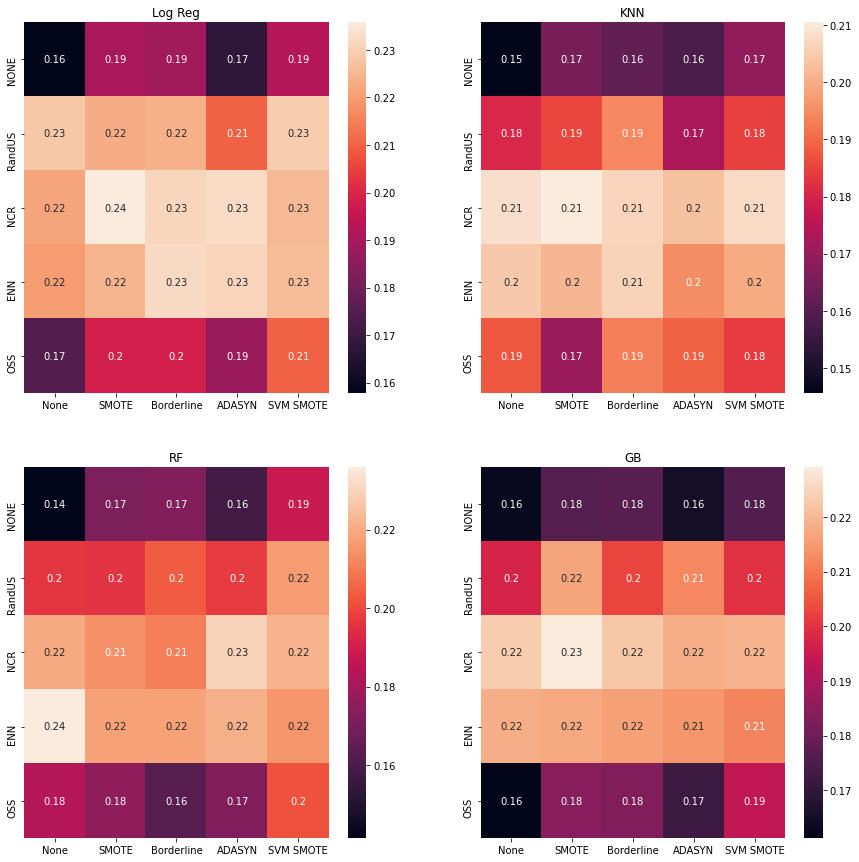

In [23]:
m2 = show_hm2(m1,fp='init_hm_all_hold')

In [24]:
w_init = []

In [25]:
# the results are never consistent, these three consistently do well

w_init = [
    'Log Reg SVM SMOTE ENN',
    'RF SMOTE ENN',
    'GB ADASYN ENN'
]

## Conclusion

In [26]:
m_init = {}

for mk in m1:
    for w in w_init:
        if w in mk:
    #if ('ENN' in mk): #if ('NCR' in mk) | 
            m_init.update({mk:m1[mk]})
        
        

### Confusion Matrixs

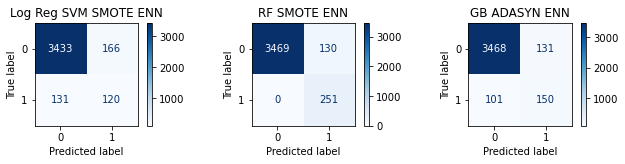

In [27]:
show_cms(m_init,fp='cm_init_all_hold')

### PR Curve

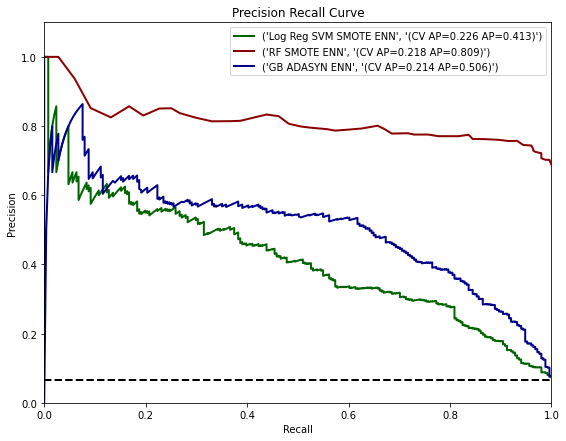

In [28]:
#fps = ['prc_init_lr','prc_init_knn','prc_init_rf','prc_init_gb']

plot_pr_curve(m_init,fp='prc_init_all_hold')

# Hyperparm Tuning

In [29]:
m_hyp = gridsearch_squared(m_init,has_pipe=True,print_out=True,scorer=False)

-----------------------------------------------------------------------------------------
Log Reg SVM SMOTE ENN
Average AP: 0.2298, Std AP: 0.0004, Best AP: 0.2303
Best Estimator: LogisticRegression(C=1, l1_ratio=0.5, multi_class='ovr', penalty='none',
                   random_state=2, solver='sag')
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
RF SMOTE ENN
Average AP: 0.2173, Std AP: 0.0056, Best AP: 0.2236
Best Estimator: RandomForestClassifier(class_weight='balanced_subsample', max_features='log2',
                       min_samples_split=7, n_estimators=95, random_state=2)
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
GB ADASYN ENN
Average AP: 0.2159, Std AP: 0.0039, Best AP: 0.2212
Best Estimator: GradientBoostingCla

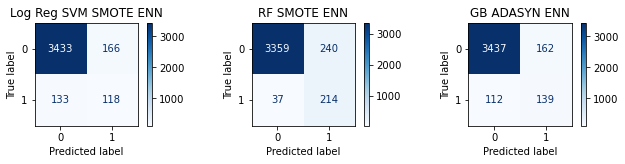

In [30]:
show_cms(m_hyp,fp='cm_hyp_all_hold')

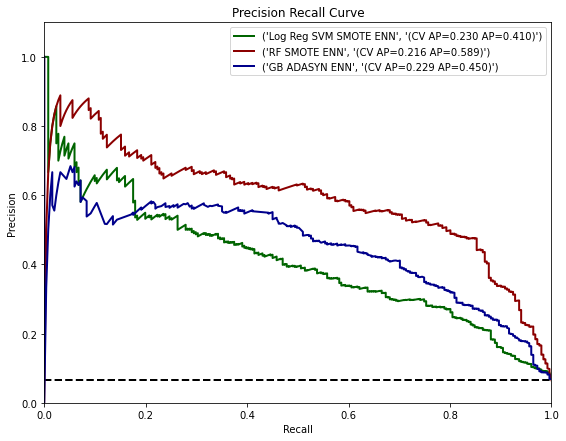

In [31]:
#fps = ['prc_hyp_lr','prc_hyp_knn','prc_hyp_rf','prc_hyp_gb']
#t_clfs = ['Log Reg','RF','GB']
plot_pr_curve(m_hyp,fp='prc_hyp_all_hold')

#### Heavy tendency to over fit.  Going tune sample strategies first, then hyperparam tune.

# Sample Strategy Tuning

## Over Sample Tunning

In [32]:
m_os = gridsearch_OS(m_hyp,overs,ks)

-----------------------------------------------------------------------------------------
Log Reg SVM SMOTE ENN
Average AP: 0.2291, Std AP: 0.002, Best AP: 0.2316
Best Estimator: LogisticRegression(C=1, l1_ratio=0.5, multi_class='ovr', penalty='none',
                   random_state=2, solver='sag')
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
RF SMOTE ENN
Average AP: 0.2097, Std AP: 0.0049, Best AP: 0.2165
Best Estimator: RandomForestClassifier(class_weight='balanced_subsample', max_features='log2',
                       min_samples_split=7, n_estimators=95, random_state=2)
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
GB ADASYN ENN
Average AP: 0.2279, Std AP: 0.0019, Best AP: 0.2297
Best Estimator: GradientBoostingClas

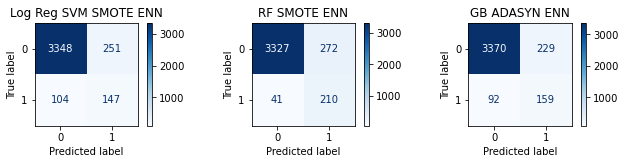

In [33]:
show_cms(m_os,fp='cm_os_all_hold')

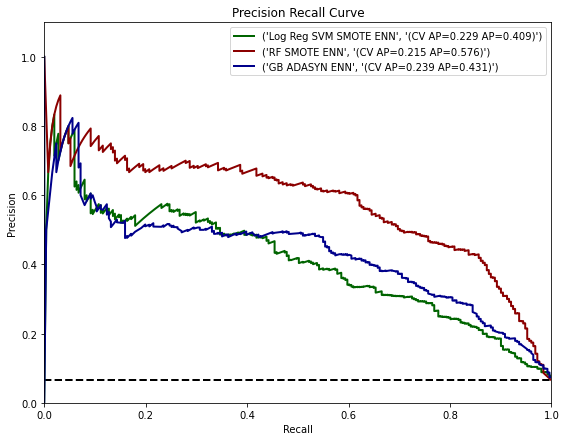

In [34]:
plot_pr_curve(m_os)#,fps='prc_hyp_all_hold'

## Under Sample Tuning

In [35]:
m_us = gridsearch_US(m_os,unders,ks)

-----------------------------------------------------------------------------------------
Log Reg SVM SMOTE ENN
Average AP: 0.2316, Std AP: 0.005, Best AP: 0.2363
Best Estimator: LogisticRegression(C=1, l1_ratio=0.5, multi_class='ovr', penalty='none',
                   random_state=2, solver='sag')
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
RF SMOTE ENN
Average AP: 0.2144, Std AP: 0.0112, Best AP: 0.2261
Best Estimator: RandomForestClassifier(class_weight='balanced_subsample', max_features='log2',
                       min_samples_split=7, n_estimators=95, random_state=2)
-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
GB ADASYN ENN
Average AP: 0.2239, Std AP: 0.0081, Best AP: 0.2342
Best Estimator: GradientBoostingClas

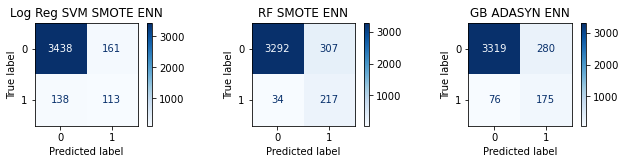

In [36]:
show_cms(m_us,fp='cm_us_all_hold')

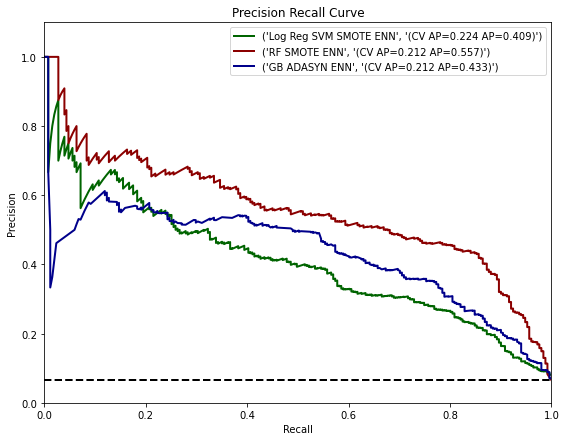

In [37]:
plot_pr_curve(m_us,fp='prc_hyp_all_hold')

w_us = ['Log Reg None OSS(AP)','RF SMOTE NCR(Fb5)','GB Borderline ENN(Fb3)']

m_us_ = {}

for mk in m_us:
    for w in w_us:
        if w in mk:
    #if ('ENN' in mk): #if ('NCR' in mk) | 
            m_us_.update({mk:m_us[mk]})

# Validation

In [39]:
model_dicts = [m_init,m_us]
e = 1
to_val = {}

for m in model_dicts:
    for key in m:   
        if e == 1:
            n_key = key + '(I)'
        else:
            n_key = key + '(F)'
        
        to_val.update({n_key:m[key]})
    
    e += 1
    

In [40]:
m_test = validation(to_val)

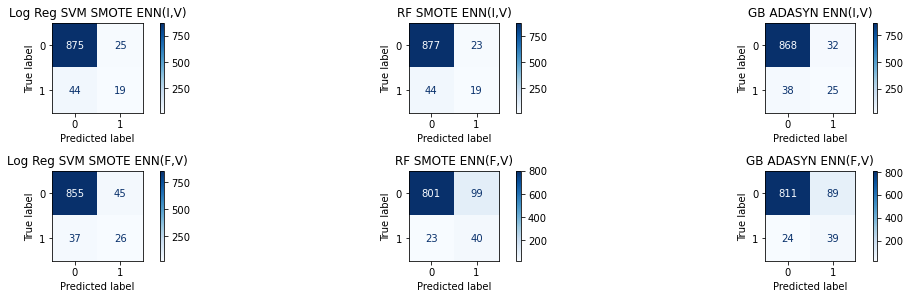

In [41]:
show_cms(m_test,test=y_test,sy=3)

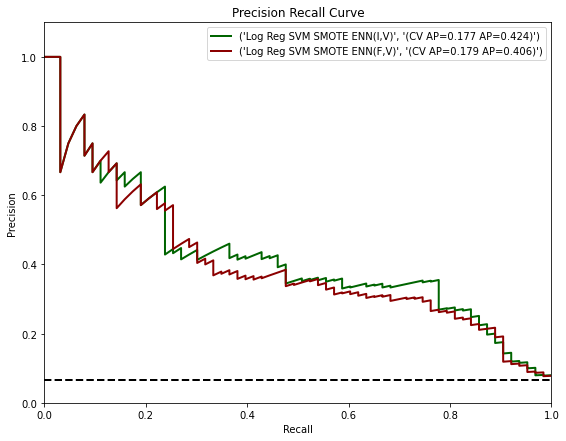

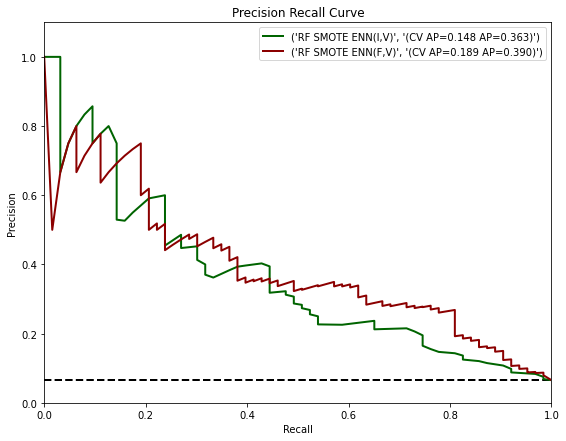

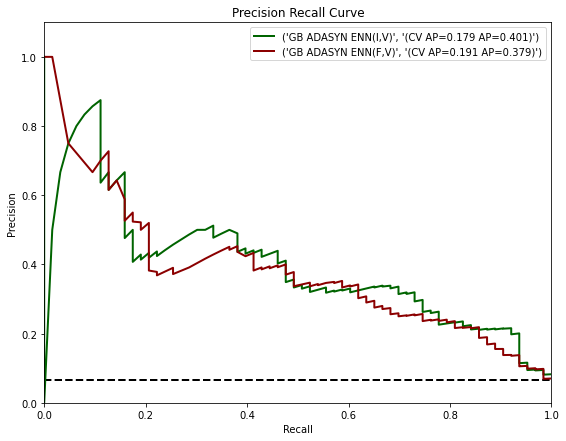

In [42]:
pr_curves(m_test,y_true=y_test)

15


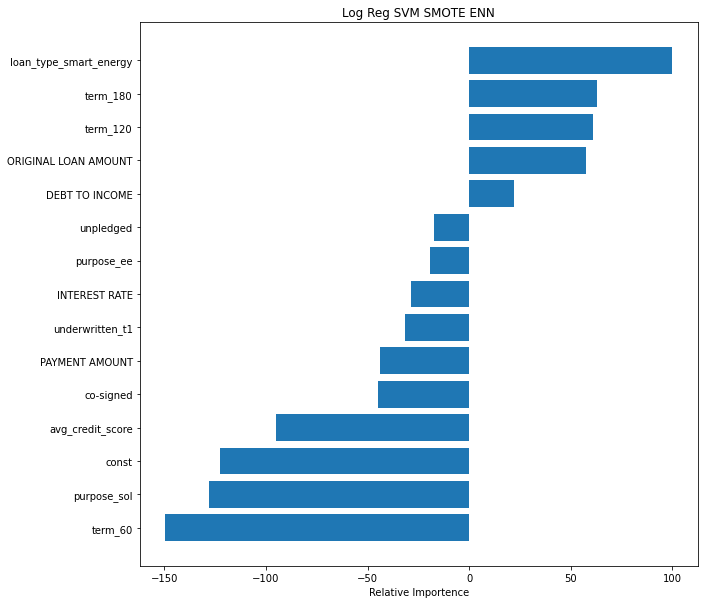

15


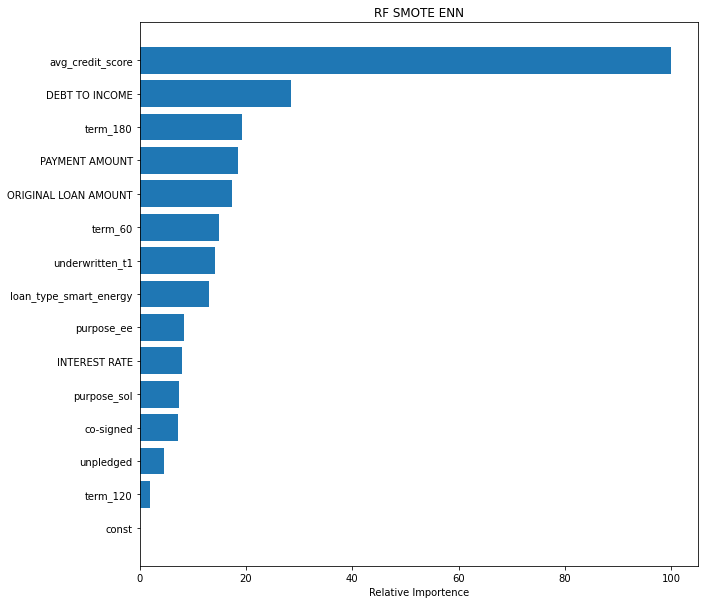

15


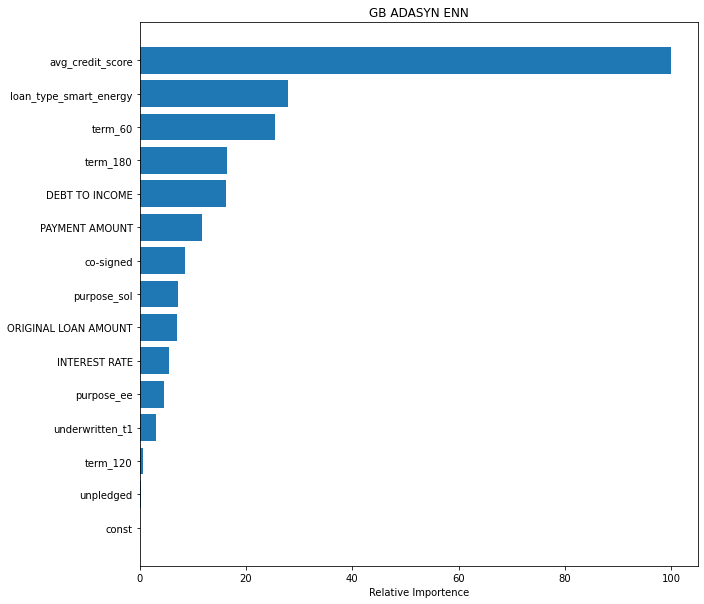

In [45]:

feat_importance(m_us)

# Conclusion

Gradient Boosting seems to be the best choice, however, none are ideal.  The average precision score did not really improve from hyper-parameter tuning, more true positives were found at the end but at a seemingly consistent trade off of false positives.  The most influential features across all three classifiers was smart energy loan type and terms of 60 or 180 months.  Credit score was the most influential by far for gradient boosting. Next steps could involve XGBoost, or to segment clients based on the probability they may fall into bad standing rather than a simple binary conclusion.   